Experiment 8 : Compare different classification algorithms (considering suitable data and problem 
statements) using precision, recall and accuracy.

DataSet : Breast Cancer dataset (which is included in scikit-learn)

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [11]:
# Load dataset
iris = load_breast_cancer()
X = iris.data
y = iris.target

In [12]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}


In [15]:
# Store results
results = []

In [16]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

In [17]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Classification Model Comparison:\n")
print(results_df)

Classification Model Comparison:

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.982456   0.979702  0.982804
1        Decision Tree  0.912281   0.901627  0.917328
2  K-Nearest Neighbors  0.959064   0.957458  0.954365
3                  SVM  0.976608   0.974868  0.974868
4        Random Forest  0.976608   0.978167  0.971561


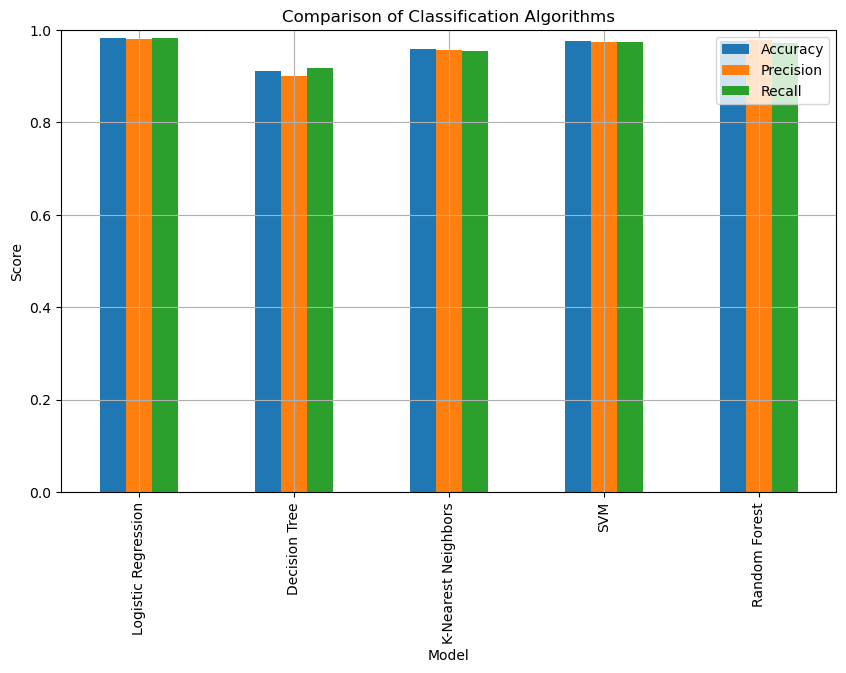

In [18]:
# Plot comparison graph
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(True)
plt.show()
